In [1]:
import pandas as pd             # For reading data and data manipulation
import numpy as np              # For numerical operations
import seaborn as sns           # For high-level statistical plotting
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.impute import SimpleImputer        # For handling missing values
from sklearn.linear_model import LinearRegression  # For fitting the regression model
from sklearn.metrics import mean_absolute_error, r2_score  # For evaluation metrics


In [2]:
# Load the dataset
df = pd.read_csv('teams.csv')

# Select relevant columns
df = df[['team', 'country', 'year', 'athletes', 'prev_medals', 'medals']]

# Show the first few rows
print(df.head().to_markdown())

|    | team   | country     |   year |   athletes |   prev_medals |   medals |
|---:|:-------|:------------|-------:|-----------:|--------------:|---------:|
|  0 | AFG    | Afghanistan |   1964 |          8 |             0 |        0 |
|  1 | AFG    | Afghanistan |   1968 |          5 |             0 |        0 |
|  2 | AFG    | Afghanistan |   1972 |          8 |             0 |        0 |
|  3 | AFG    | Afghanistan |   1980 |         11 |             0 |        0 |
|  4 | AFG    | Afghanistan |   2004 |          5 |             0 |        0 |


In [3]:
# Find rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing data:\n", missing_rows)

Rows with missing data:
      team                           country  year  athletes  prev_medals  \
19    ALB                           Albania  1992         9          NaN   
26    ALG                           Algeria  1964         7          NaN   
39    AND                           Andorra  1976         3          NaN   
50    ANG                            Angola  1980        17          NaN   
59    ANT               Antigua and Barbuda  1976        17          NaN   
...   ...                               ...   ...       ...          ...   
2092  VIN  Saint Vincent and the Grenadines  1988         6          NaN   
2103  YAR                       North Yemen  1984         3          NaN   
2105  YEM                             Yemen  1992         8          NaN   
2112  YMD                       South Yemen  1988         5          NaN   
2120  ZAM                            Zambia  1964        15          NaN   

      medals  
19         0  
26         0  
39         0  
50

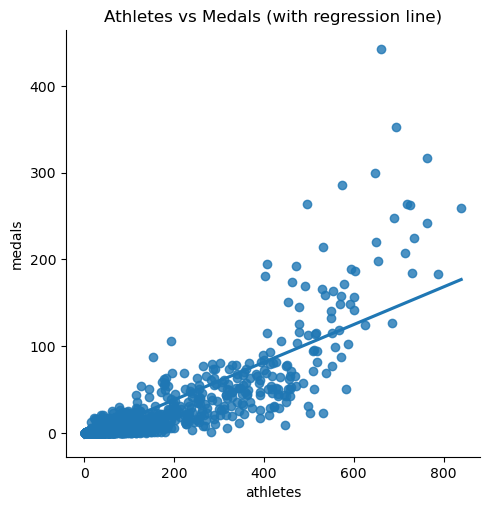

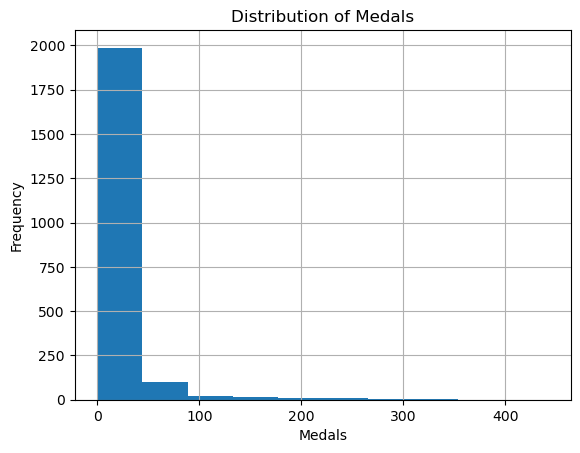

In [5]:
# Visualize Feature Relationships
sns.lmplot(x="athletes", y="medals", data=df, fit_reg=True, ci=None)
plt.title("Athletes vs Medals (with regression line)")
plt.show()

df['medals'].hist()
plt.title("Distribution of Medals")
plt.xlabel("Medals")
plt.ylabel("Frequency")
plt.show()


In [6]:
# Impute missing values in 'prev_medals' with the column mean
imputer = SimpleImputer(strategy='mean')  
df[['prev_medals']] = imputer.fit_transform(df[['prev_medals']])

# (Optional) Drop any remaining rows with missing values (if any other columns had NaN)
df = df.dropna()


In [7]:
# Define feature matrix X and target y
X = df[['athletes', 'prev_medals']]
y = df['medals']


In [8]:
# Split data by Olympic year (pre-2012 for training, 2012+ for testing)
train = df[df['year'] < 2012].copy()
test  = df[df['year'] >= 2012].copy()

# Separate predictors and target
X_train = train[['athletes', 'prev_medals']]
y_train = train['medals']
X_test  = test[['athletes', 'prev_medals']]
y_test  = test['medals']


In [9]:
# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Add predictions to the test DataFrame
test['predicted_medals'] = predictions

# Ensure no negative medal counts (set negatives to 0) and round to integer
test.loc[test['predicted_medals'] < 0, 'predicted_medals'] = 0
test['predicted_medals'] = test['predicted_medals'].round()

In [11]:
mae = mean_absolute_error(y_test, test['predicted_medals'])
r2  = r2_score(y_test, test['predicted_medals'])
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")


Mean Absolute Error: 3.304
R^2 Score: 0.922


In [12]:
# pipeline is: Load Data → Explore/Visualize → Preprocess (impute) → Split → Train → Predict → Evaluate.

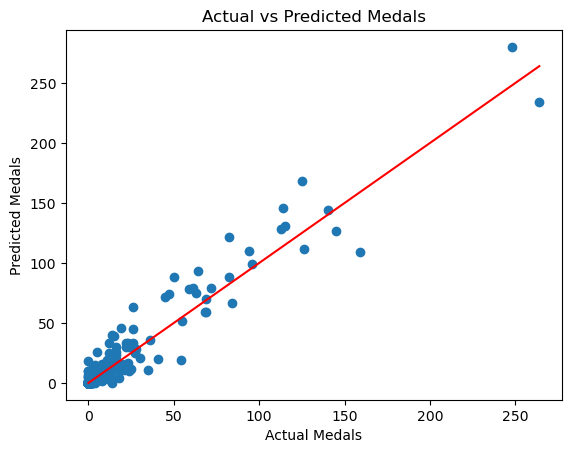

In [13]:
# visualize model performance by Plotting Actual vs Predicted Medals 
plt.scatter(y_test, test['predicted_medals'])
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.title('Actual vs Predicted Medals')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')  # Line y=x for reference
plt.show()


In [14]:
import joblib

# Save model to file
joblib.dump(model, 'olympic_medal_predictor.pkl')

['olympic_medal_predictor.pkl']